# Laboratorio 4 - Aprendizaje profundo para la clasificación de imágenes


Siga las instrucciones en negritas para completar el laboratorio.

------------

## El reto

**Su tarea es la de construir un clasificador de imágenes usando Keras (Tensorflow) y Redes Neuronales Convolucionales (CNN) para un conjunto de datos conocido como "Fashion MNIST dataset""
. Este conjunto de datos incluye 10 etiquetas de diferentes tipos de ropa con imágenes de 28 by 28 *escalagris*. Hay un conjunto de datos de entrenamiento de 60,000 imágenes y un conjunto de datos de prueba de 10,000 imágenes.**

    Etiqueta	Descripción
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Los datos

**Tarea 1: Ejecute el siguiente código para descargar los datos usando Keras.**

In [54]:
from tensorflow.keras.datasets import fashion_mnist

(X_entreno, y_entreno), (X_prueba, y_prueba) = fashion_mnist.load_data()

## Visualización de los Datos

**TAREA 2: Utilice matplotlib para visualizar una imagen del conjunto de datos.  Puede ser cualquier imagen del conjunto de datos.**

In [55]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

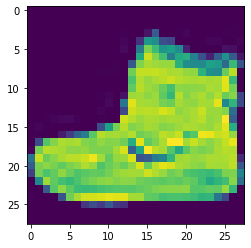

In [56]:
plt.imshow(X_entreno[0])

In [57]:
y_entreno[0] # 9 = Ankle boot

9

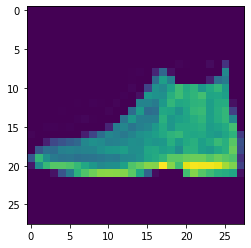

In [58]:
plt.imshow(X_prueba[0])

In [59]:
y_prueba[0] # 9 = Ankle boot

9

## Preprocesamiento de los Datos

**TAREA 3: Normalice los datos X entreno y X prueba dividiendo por el valor máximo de los arreglos de las imágenes.**

In [60]:
import numpy as np
from PIL import Image

In [61]:
X_entreno_norm = np.linalg.norm(X_entreno)
X_entreno = X_entreno / X_entreno_norm

In [62]:
X_prueba_norm = np.linalg.norm(X_prueba)
X_prueba = X_prueba / X_prueba_norm

**TAREA 4: Cambie el formato de los arreglos X para que incluyan una 4rta dimensión del canal de color. Similar a lo que se hizo en clase para el conjunto de datos MNIST de números.**

In [63]:
X_entreno.shape

(60000, 28, 28)

In [64]:
X_entreno = X_entreno[:, :, :, np.newaxis]
X_entreno.shape

(60000, 28, 28, 1)

In [65]:
X_prueba.shape

(10000, 28, 28)

In [66]:
X_prueba = X_prueba[:, :, :, np.newaxis]
X_prueba.shape

(10000, 28, 28, 1)

**TAREA 5: Convierta los valores de y_entreno y y_prueba para que estén "one-hot encoded" para poder hacer un análisis categórico con Keras.**

In [67]:
from keras.utils import to_categorical

In [68]:
y_entreno

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [69]:
y_prueba

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [70]:
y_entreno_ohe = to_categorical(y_entreno)
y_entreno_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
y_prueba_ohe = to_categorical(y_prueba)
y_prueba_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Configuración del Modelo

**TAREA 6: Utilice Keras para crear un modelo que contenga, al menos, las siguientes capas (pero siéntase en libertad de experimentar):**

* Capa "2D Convolutional", filtros = 32 y tamaño_kernel = (4, 4)
* Capa de "Pooling""
 de tamaño = (2, 2)

* Capa de Aplanado
* Capa Densa (128 unidades, pero siéntase en libertad de "jugar"con este valor), activación RELU

* Una capa Final Densa de 10 unidades con activación softmax

**Luego compile el modelo con estos parámetros: loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']**

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [73]:
modelo = Sequential()

modelo.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape=(28,28,1), activation='relu'))
modelo.add(MaxPooling2D(pool_size = (2,2)))

modelo.add(Flatten())

modelo.add(Dense(128))
modelo.add(Activation('relu'))

modelo.add(Dropout(0.5))

modelo.add(Dense(10))
modelo.add(Activation('softmax'))

modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

In [74]:
from tensorflow.keras.utils import plot_model
plot_model(modelo, to_file='grafica_modelo.png', show_shapes=True, show_layer_names=True, show_dtype=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Entrenamiento del Modelo
**TAREA 6: Entrene/Ajuste el modelo con el conjunto X_entreno set. La cantidad de épocas le queda a Ud determinar.**

In [75]:
from tensorflow.keras.callbacks import EarlyStopping
detencion_temprana = EarlyStopping(monitor='val_loss', patience=2)

In [76]:
tanda_size = 16

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
resultados = modelo.fit(x=X_entreno, y=y_entreno_ohe, epochs=20, callbacks=[detencion_temprana])

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3365 - accuracy: 0.1017
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2861 - accuracy: 0.2862
Epoch 3/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1690 - accuracy: 0.6343
Epoch 4/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1389 - accuracy: 0.7046
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1268 - accuracy: 0.7319
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1195 - accuracy: 0.7455
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1152 - accuracy: 0.7564
Epoch 8/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1110 - accuracy: 0.7674
Epoch 9/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1078 - accuracy: 0.7770
Epoch 10/20
1875/1875 [==============================] - 16s 8ms/step - l

### Evaluación del Modelo

**TAREA 7: Muestre los valores de [accuracy, precision, recall, f1-score] que logró el modelo con el conjunto de datos X_prueba data set. Tenga en mente que hay múltiples formas de hacer esto.  Sin embargo, le recomendamos que utilice el mismo procedimiento usado mencionado en la parte de intuición, en clase.**

In [81]:
import pandas as pd

In [86]:
perdidas = pd.DataFrame(modelo.history.history)

In [89]:
modelo.metrics_names

['loss', 'accuracy']

<AxesSubplot:>

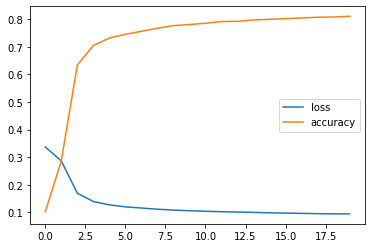

In [88]:
perdidas[['loss', 'accuracy']].plot()

In [105]:
modelo.evaluate(X_prueba)

313/313 [==============================] - 0s 509us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [95]:
from tensorflow.keras.preprocessing import image

In [101]:
probabilidades_pred = modelo.predict_generator(X_prueba)

In [102]:
probabilidades_pred

array([[1.6210462e-14, 1.8411766e-21, 3.5642409e-19, ..., 5.9796833e-03,
        5.7896798e-09, 9.2490083e-01],
       [8.9030383e-10, 5.4788537e-14, 9.9999440e-01, ..., 0.0000000e+00,
        2.1301368e-14, 0.0000000e+00],
       [3.7937450e-25, 1.0000000e+00, 1.2010785e-30, ..., 0.0000000e+00,
        7.4003166e-36, 0.0000000e+00],
       ...,
       [1.0893350e-05, 2.0428271e-12, 2.6710708e-08, ..., 7.3698543e-17,
        9.9998534e-01, 7.4431225e-15],
       [9.1535580e-21, 1.0000000e+00, 1.1998550e-24, ..., 4.3683909e-32,
        1.0747374e-27, 4.6074244e-28],
       [2.2378897e-11, 1.2388358e-17, 8.3295740e-12, ..., 1.1807160e-06,
        1.8846226e-06, 2.0241901e-09]], dtype=float32)

# Gran trabajo!